<a href="https://www.kaggle.com/code/taha3012000/breast-cancer?scriptVersionId=104333481" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/Breast_Cancer.csv


Get data

In [2]:
data=pd.read_csv('/kaggle/input/breast-cancer/Breast_Cancer.csv')
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


No. of rows and columns

In [3]:
data.shape

(4024, 16)

Information about data like data types and missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

No missing values

In [5]:
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

No. of duplicated values = 1

In [6]:
data.duplicated().sum()


1

drop it

In [7]:
data.drop_duplicates(inplace=True)

**Observations**
* MAX age = 69 and min = 30
* MAX size of tumor = 140 and min = 1!
* And so on for last three columns
    

In [8]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


3407 of the ladies alive and 616 dead

In [9]:
data['Status'].value_counts()

Alive    3407
Dead      616
Name: Status, dtype: int64

1. 3412 of ladies are white
2. 291 of ladies are black
3. 320 other "Asian .. etc"

In [10]:
data['Race'].value_counts()

White    3412
Other     320
Black     291
Name: Race, dtype: int64

Mapping to convert categorical data to numerical " for modeling"

In [11]:
mapp={'Dead':0,'Alive':1}
data['Status']=data['Status'].map(mapp)
data['Status']=data['Status'].astype(int)
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,1
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,1
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,1
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,1
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,1


# Insights

* 89.6% of Asian ladies are alive
* 85% of white are alive
* 74.9% of black ladies are alive " lowest"

In [12]:
data[['Race','Status']].groupby('Race',as_index=False).mean().sort_values(by='Status',ascending=0)

,Race,Status
1,Other,0.896875
2,White,0.850528
0,Black,0.749141


* 86.4% of Married ladies are alive
* 83% of single are alive
* 81.4% of divoreced are alive
* 79% of widowed are alive
* 66.6% of separated are alive
# **Just a guess, women who are separated are more likely to die from breast cancer "perhaps because they are mentally ill more than the others"**

In [13]:
data[['Marital Status','Status']].groupby('Marital Status',as_index=False).mean().sort_values(by='Status',ascending=0)

,Marital Status,Status
1,Married,0.864497
3,Single,0.830894
0,Divorced,0.814815
4,Widowed,0.791489
2,Separated,0.666667


In [14]:
data.rename(columns = {'T Stage ':'T Stage'}, inplace = True)

* 90% of ladies in T1 stage are alive
* 83% of ladies in T2 stage are alive
* 78% of ladies in T3 stage are alive
* 60.7% of ladies in T4 stage are alive "hump"

In [15]:
data[['T Stage','Status']].groupby('T Stage',as_index=False).mean().sort_values(by='Status',ascending=0)

,T Stage,Status
0,T1,0.901998
1,T2,0.830347
2,T3,0.782364
3,T4,0.607843


* 90% of ladies in N1 stage are alive
* 79.8% of ladies in N2 stage are alive
* 61.6% of ladies in N3 stage are alive "hump"

In [16]:
data[['N Stage','Status']].groupby('N Stage',as_index=False).mean().sort_values(by='Status',ascending=0)

,N Stage,Status
0,N1,0.901135
1,N2,0.798780
2,N3,0.616525


And so on for other stages

In [17]:
data[['6th Stage','Status']].groupby('6th Stage',as_index=False).mean().sort_values(by='Status',ascending=0)

,6th Stage,Status
0,IIA,0.926380
1,IIB,0.880531
2,IIIA,0.824762
3,IIIB,0.701493
4,IIIC,0.616525


In [18]:
data[['differentiate','Status']].groupby('differentiate',as_index=False).mean().sort_values(by='Status',ascending=0)

,differentiate,Status
3,Well differentiated,0.928177
0,Moderately differentiated,0.870213
1,Poorly differentiated,0.763276
2,Undifferentiated,0.526316


The distance greatly affects the death, as the analyzes may not be accurate or spaced due to the length of time, which makes women unable to do them periodically.

In [19]:
data[['A Stage','Status']].groupby('A Stage',as_index=False).mean().sort_values(by='Status',ascending=0)

,A Stage,Status
1,Regional,0.852200
0,Distant,0.619565


Estrogen and Progesterone negative cases are more likely to die

In [20]:
data[['Estrogen Status','Status']].groupby('Estrogen Status',as_index=False).mean().sort_values(by='Status',ascending=0)

,Estrogen Status,Status
1,Positive,0.864678
0,Negative,0.598513


In [21]:
data[['Progesterone Status','Status']].groupby('Progesterone Status',as_index=False).mean().sort_values(by='Status',ascending=0)

,Progesterone Status,Status
1,Positive,0.876090
0,Negative,0.707736


# Women who are in the T4 stage and in the age group under 40 years or over 65 years are more likely to die

In [22]:
fig = px.strip(data, x="Age", y="T Stage", orientation="h", color="Status")
fig.show()

The smaller the tumor, the greater the chance of recovery, the greater the probability of cure or death

In [23]:
fig = px.ecdf(data, x="Tumor Size", color="Status")
fig.show()

In the period from 25 to 85 months, the death probability is higher

In [24]:
fig = px.ecdf(data, x="Survival Months", color="Status")
fig.show()

In [25]:
fig = px.ecdf(data, x="Regional Node Examined", color="Status")
fig.show()

In [26]:
fig = px.ecdf(data, x="Reginol Node Positive", color="Status")
fig.show()

In advanced age, the probability of death is higher

In [27]:
fig = px.ecdf(data, x="Age", color="Status")
fig.show()

preprocessing for modeling

In [28]:
data['Age'].unique()

array([68, 50, 58, 47, 51, 40, 69, 46, 65, 48, 62, 61, 56, 43, 60, 57, 55,
       63, 66, 53, 59, 54, 49, 64, 42, 37, 67, 31, 52, 33, 45, 38, 39, 36,
       41, 44, 32, 34, 35, 30])

In [29]:
data.loc[data['Age']<=40,'Age']=0
data.loc[(data['Age']>40)&(data['Age']<=50),'Age']=1
data.loc[(data['Age']>50)&(data['Age']<=60),'Age']=2
data.loc[data['Age']>60,'Age']=3
data['Age']=data['Age'].astype(int)
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,3,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,1
1,1,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,1
2,2,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,1
3,2,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,1
4,1,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,1


In [30]:
mapp1={'Single':0,'Married':1,'Divorced':2,'Widowed':3,'Separated':4}
data['Marital Status']=data['Marital Status'].map(mapp1)
data['Marital Status']=data['Marital Status'].fillna(0)
data['Marital Status']=data['Marital Status'].astype(int)

In [31]:
mapp2={'T1':1,'T2':2,'T3':3,'T4':4}
data['T Stage']=data['T Stage'].map(mapp2)
data['T Stage']=data['T Stage'].fillna(0)
data['T Stage']=data['T Stage'].astype(int)

In [32]:
mapp3={'N1':1,'N2':2,'N3':3,'N4':4}
data['N Stage']=data['N Stage'].map(mapp3)
data['N Stage']=data['N Stage'].fillna(0)
data['N Stage']=data['N Stage'].astype(int)

In [33]:
mapp4={'IIA':0,'IIB':1,'IIIA':2,'IIIB':3,'IIIC':4}
data['6th Stage']=data['6th Stage'].map(mapp4)
data['6th Stage']=data['6th Stage'].fillna(0)
data['6th Stage']=data['6th Stage'].astype(int)

In [34]:
mapp5={'Moderately differentiated':0,'Poorly differentiated':1,'Well differentiated':2,'Undifferentiated':3}
data['differentiate']=data['differentiate'].map(mapp5)
data['differentiate']=data['differentiate'].fillna(0)
data['differentiate']=data['differentiate'].astype(int)

In [35]:
mapp6={'White':0,'Black':1,'other':2}
data['Race']=data['Race'].map(mapp6)
data['Race']=data['Race'].fillna(0)
data['Race']=data['Race'].astype(int)

In [36]:
mapp7={'Negative':0,'Positive':1}
data['Estrogen Status']=data['Estrogen Status'].map(mapp7)
data['Estrogen Status']=data['Estrogen Status'].fillna(0)
data['Estrogen Status']=data['Estrogen Status'].astype(int)

In [37]:
mapp7={'Negative':0,'Positive':1}
data['Progesterone Status']=data['Progesterone Status'].map(mapp7)
data['Progesterone Status']=data['Progesterone Status'].fillna(0)
data['Progesterone Status']=data['Progesterone Status'].astype(int)

In [38]:
mapp8={'Regional':0,'Distant':1}
data['A Stage']=data['A Stage'].map(mapp8)
data['A Stage']=data['A Stage'].fillna(0)
data['A Stage']=data['A Stage'].astype(int)

In [39]:
data['Grade']=pd.to_numeric(data['Grade'], errors='coerce')



In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4023 non-null   int64  
 1   Race                    4023 non-null   int64  
 2   Marital Status          4023 non-null   int64  
 3   T Stage                 4023 non-null   int64  
 4   N Stage                 4023 non-null   int64  
 5   6th Stage               4023 non-null   int64  
 6   differentiate           4023 non-null   int64  
 7   Grade                   4004 non-null   float64
 8   A Stage                 4023 non-null   int64  
 9   Tumor Size              4023 non-null   int64  
 10  Estrogen Status         4023 non-null   int64  
 11  Progesterone Status     4023 non-null   int64  
 12  Regional Node Examined  4023 non-null   int64  
 13  Reginol Node Positive   4023 non-null   int64  
 14  Survival Months         4023 non-null   

In [41]:
data['Grade']=data['Grade'].fillna(0)

data['Grade']=data['Grade'].astype(int)

In [42]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,3,0,1,1,1,0,1,3,0,4,1,1,24,1,60,1
1,1,0,1,2,2,2,0,2,0,35,1,1,14,5,62,1
2,2,0,2,3,3,4,0,2,0,63,1,1,14,7,75,1
3,2,0,1,1,1,0,1,3,0,18,1,1,2,1,84,1
4,1,0,1,2,1,1,1,3,0,41,1,1,3,1,50,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4023 non-null   int64
 1   Race                    4023 non-null   int64
 2   Marital Status          4023 non-null   int64
 3   T Stage                 4023 non-null   int64
 4   N Stage                 4023 non-null   int64
 5   6th Stage               4023 non-null   int64
 6   differentiate           4023 non-null   int64
 7   Grade                   4023 non-null   int64
 8   A Stage                 4023 non-null   int64
 9   Tumor Size              4023 non-null   int64
 10  Estrogen Status         4023 non-null   int64
 11  Progesterone Status     4023 non-null   int64
 12  Regional Node Examined  4023 non-null   int64
 13  Reginol Node Positive   4023 non-null   int64
 14  Survival Months         4023 non-null   int64
 15  Status               

dealing with outliers

In [44]:
outlier_percentage = {}
for feature in ['Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months']:
    tempData = data.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'Tumor Size': 5.52,
 'Regional Node Examined': 1.79,
 'Reginol Node Positive': 8.55,
 'Survival Months': 0.45}

In [45]:
outlier = data[(data[feature]>Lower_range) & (data[feature]<Upper_range)].reset_index(drop=True)


In [46]:
data.shape

(4023, 16)

In [47]:
corr=data.corr()
fig = px.imshow(corr, text_auto=True,width=1000, height=1000)
fig.show()


In [48]:
X=data.drop('Status',axis=1)
y=data['Status']

feature selection

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()
ex.fit(X,y)

ExtraTreesClassifier()

In [50]:
ex.feature_importances_


array([0.06511675, 0.01544289, 0.06274277, 0.03027759, 0.03094741,
       0.03290593, 0.02049056, 0.02245027, 0.00721119, 0.11680804,
       0.02284849, 0.02759684, 0.12473521, 0.08773799, 0.33268806])

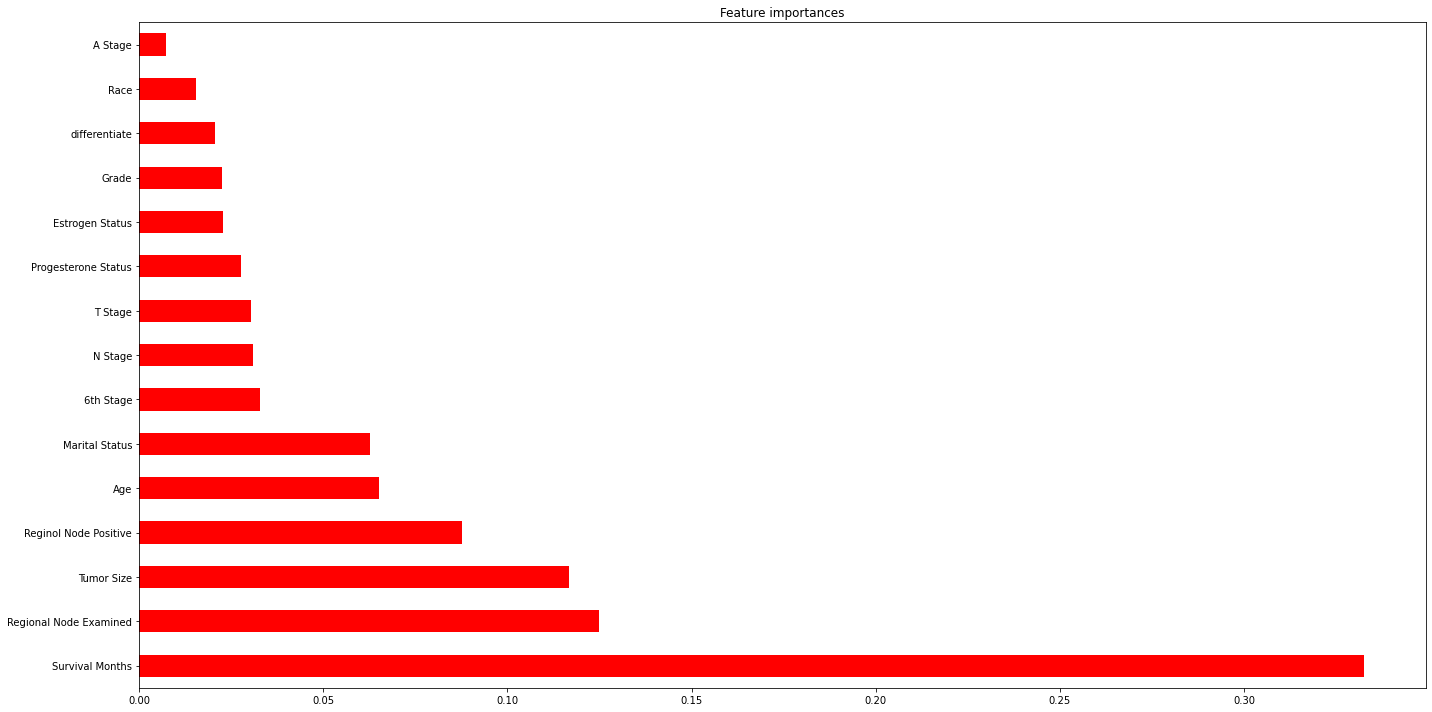

In [51]:
plt.figure(figsize=(20,10))
plt.title('Feature importances')
feat=pd.Series(ex.feature_importances_,index=X.columns)
feat.nlargest(15).plot(kind='barh', color="r", align="center")
plt.tight_layout()
plt.grid(False)
plt.show()

Modeling

In [52]:
X.drop(['A Stage'],axis=1,inplace=True)

In [53]:
from sklearn.model_selection import train_test_split ,cross_val_score,RandomizedSearchCV
X_train ,X_test,y_train ,y_test =train_test_split(X,y,test_size =.2 , random_state=18 , stratify=y)

Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# DL

In [55]:
from tensorflow import keras
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [56]:
Model=keras.Sequential([keras.layers.Dense(100,activation='relu'),
                           keras.layers.Dense(1,activation='sigmoid')])

2022-08-27 17:46:21.098099: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


90.9% accuracy, 90% validation

In [57]:
Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=Model.fit(X_train,y_train,epochs=128,batch_size=64,validation_split=0.2,callbacks=[callback],verbose=1)

2022-08-27 17:46:21.385947: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/128
41/41 [==============================] - 1s 8ms/step - loss: 0.5269 - acc: 0.7867 - val_loss: 0.3908 - val_acc: 0.8882
Epoch 2/128
41/41 [==============================] - 0s 3ms/step - loss: 0.3625 - acc: 0.8718 - val_loss: 0.3241 - val_acc: 0.8882
Epoch 3/128
41/41 [==============================] - 0s 3ms/step - loss: 0.3207 - acc: 0.8819 - val_loss: 0.2997 - val_acc: 0.8960
Epoch 4/128
41/41 [==============================] - 0s 3ms/step - loss: 0.3040 - acc: 0.8889 - val_loss: 0.2893 - val_acc: 0.8991
Epoch 5/128
41/41 [==============================] - 0s 3ms/step - loss: 0.2951 - acc: 0.8904 - val_loss: 0.2846 - val_acc: 0.9006
Epoch 6/128
41/41 [==============================] - 0s 3ms/step - loss: 0.2905 - acc: 0.8939 - val_loss: 0.2821 - val_acc: 0.9006
Epoch 7/128
41/41 [==============================] - 0s 3ms/step - loss: 0.2872 - acc: 0.8970 - val_loss: 0.2803 - val_acc: 0.9037
Epoch 8/128
41/41 [==============================] - 0s 3ms/step - loss: 0.2856 - a

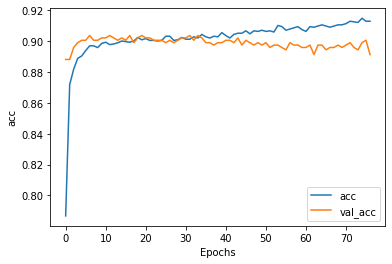

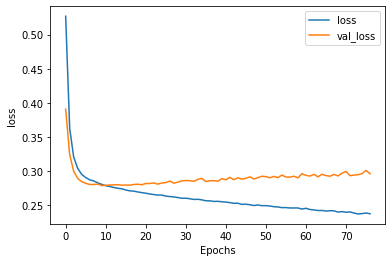

In [58]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  

plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [59]:
Model1=keras.Sequential([keras.layers.Dense(100,activation='relu'),
                           keras.layers.Dense(1,activation='sigmoid')])
Model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=Model1.fit(X_train,y_train,epochs=20,batch_size=10,validation_split=0.2,callbacks=[callback],verbose=1)

Epoch 1/20
258/258 [==============================] - 1s 3ms/step - loss: 0.3741 - acc: 0.8644 - val_loss: 0.2947 - val_acc: 0.8991
Epoch 2/20
258/258 [==============================] - 1s 2ms/step - loss: 0.2955 - acc: 0.8928 - val_loss: 0.2797 - val_acc: 0.9037
Epoch 3/20
258/258 [==============================] - 1s 3ms/step - loss: 0.2872 - acc: 0.8947 - val_loss: 0.2787 - val_acc: 0.9068
Epoch 4/20
258/258 [==============================] - 1s 3ms/step - loss: 0.2815 - acc: 0.8967 - val_loss: 0.2791 - val_acc: 0.9037
Epoch 5/20
258/258 [==============================] - 1s 3ms/step - loss: 0.2793 - acc: 0.8994 - val_loss: 0.2815 - val_acc: 0.9006
Epoch 6/20
258/258 [==============================] - 1s 2ms/step - loss: 0.2744 - acc: 0.8986 - val_loss: 0.2832 - val_acc: 0.8975
Epoch 7/20
258/258 [==============================] - 1s 3ms/step - loss: 0.2731 - acc: 0.8967 - val_loss: 0.2871 - val_acc: 0.9022
Epoch 8/20
258/258 [==============================] - 1s 3ms/step - loss: 0.

In [60]:
y_pred_deep1=Model1.predict(X_test)


<AxesSubplot:>

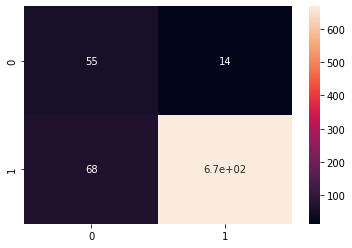

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(pd.DataFrame(confusion_matrix(y_pred_deep1.round(),y_test)) , annot=True)

In [62]:
print(classification_report(y_test, y_pred_deep1.round()))

              precision    recall  f1-score   support

           0       0.80      0.45      0.57       123
           1       0.91      0.98      0.94       682

    accuracy                           0.90       805
   macro avg       0.85      0.71      0.76       805
weighted avg       0.89      0.90      0.89       805



# ML

In [63]:
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

In [64]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting Classifier':GradientBoostingClassifier(),
         'Support Vector Machine': SVC(),
         'Stochastic Gradien Descent': SGDClassifier(),
         'Naive Bayes': GaussianNB(),
         'xgb Classifier': XGBClassifier()}

In [65]:
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='accuracy',
                                            cv=3
                                            ).mean()

    return model_scores


Random forest won

In [66]:
model_scores = fit_score(models,X_train,X_test,y_train,y_test)

model_scores

{'Logistic Regression': 0.9018707577354861,
 'KNN': 0.8683164105124934,
 'Decision Tree': 0.8459468456971647,
 'Random Forest': 0.9006223529194178,
 'Gradient Boosting Classifier': 0.8894560653979174,
 'Support Vector Machine': 0.8757698496365754,
 'Stochastic Gradien Descent': 0.8185975327821856,
 'Naive Bayes': 0.8074312452606854,
 'xgb Classifier': 0.8919436275869722}

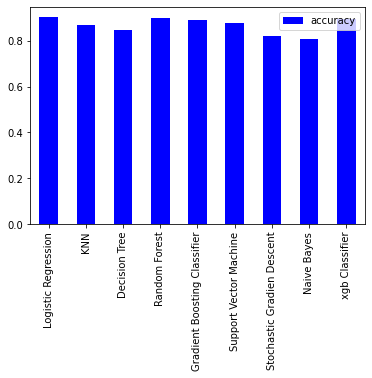

In [67]:
models = pd.DataFrame(model_scores, index=["accuracy"])
models.T.plot.bar(color="blue");

# hyperparameter tuning

In [68]:
np.random.seed(18)
params = {"n_estimators": [50,100,200, 300,400 ] ,
 "max_depth": [ 3,5,7,9,10],
 "max_features" : [ 'auto', 'sqrt', 'log2']}


rs = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=params,
                                cv=3,
                                n_iter=100,
                                verbose=1,
                              refit=True,
                                n_jobs=-1
                               )

rs.fit(X_train, y_train)

rs.best_params_

Fitting 3 folds for each of 75 candidates, totalling 225 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 75 is smaller than n_iter=100. Running 75 iterations. For exhaustive searches, use GridSearchCV.



{'n_estimators': 300, 'max_features': 'auto', 'max_depth': 7}

In [69]:
rs.best_estimator_


RandomForestClassifier(max_depth=7, n_estimators=300)

In [70]:
rs.best_score_


0.9042888423678438

In [71]:
rs.score(X_test, y_test)

0.906832298136646

In [72]:
model = RandomForestClassifier(n_estimators= 300, max_features= 'log2', max_depth= 7)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)


<AxesSubplot:>

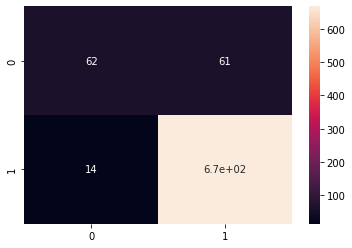

In [73]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred1)) , annot=True)



In [74]:
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.82      0.50      0.62       123
           1       0.92      0.98      0.95       682

    accuracy                           0.91       805
   macro avg       0.87      0.74      0.78       805
weighted avg       0.90      0.91      0.90       805



###### 